In [40]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense  ,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [41]:
data = pd.read_csv('GBPUSD-H1-2007-2023')
data.shape

(99900, 11)

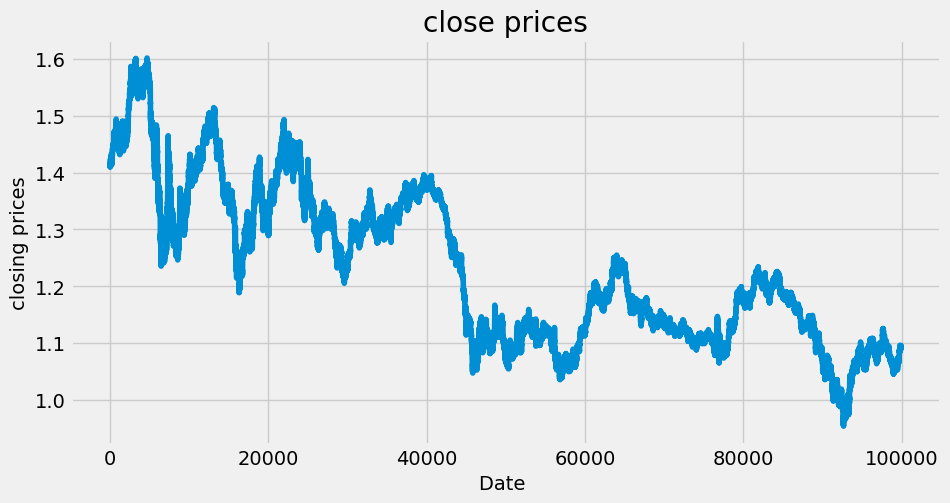

In [42]:
plt.figure(figsize=(10,5))
plt.title('close prices')
plt.plot(data['Close'])
plt.xlabel('Date ' , fontsize=14)
plt.ylabel('closing prices' , fontsize=14)
plt.show()

In [44]:


#Cretung a new dataframe with only the close , _tickvolume and the open
#data = data.filter(['Open', 'High', 'Low','Close' , 'tick_volume' ,'real_volume' , 'sma_200' , 'sma_20' ])
data = data.filter(['Close' ])
# convert the dataframe to numpy array
dataset = data.values
# spliting dataset , and math.ceil is just to round the length
train_data_lengh = math.ceil(len(dataset)*.85)
train_data_lengh

84915

In [45]:
#scale the data
scaler = MinMaxScaler(feature_range=(0 ,1 ))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.70483351],
       [0.70467913],
       [0.70514226],
       ...,
       [0.21875048],
       [0.21884311],
       [0.2181021 ]])

In [46]:
train_data = scaled_data[0:train_data_lengh , : ]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i ,0])
  y_train.append(train_data[i,0])
  if i<= 60:
    print('this is x train',x_train)
    print('and this is y train ',y_train)
    

this is x train [array([0.70483351, 0.70467913, 0.70514226, 0.70529663, 0.704216  ,
       0.70452475, 0.70606851, 0.70514226, 0.70437038, 0.70668602,
       0.70761227, 0.7093104 , 0.71147166, 0.71131729, 0.70915603,
       0.7137873 , 0.71208917, 0.71394168, 0.71255229, 0.71100854,
       0.70900165, 0.70884728, 0.71116291, 0.71100854, 0.71039103,
       0.71008228, 0.70992791, 0.71054541, 0.71023666, 0.71147166,
       0.71270667, 0.71347855, 0.71455918, 0.71733794, 0.7188817 ,
       0.72104296, 0.72042546, 0.71980796, 0.71903608, 0.71594856,
       0.71563981, 0.72521111, 0.72351298, 0.72196922, 0.72304985,
       0.72166047, 0.7176467 , 0.7188817 , 0.7194992 , 0.7194992 ,
       0.71934483, 0.71919045, 0.71687482, 0.71780107, 0.7188817 ,
       0.71702919, 0.71749232, 0.71733794, 0.71810982, 0.71841857])]
and this is y train  [0.7161029377711225]


In [47]:
#convert the x_train and the y_train to numpy arrays
x_train , y_train = np.array(x_train) , np.array(y_train)


In [48]:
#reshape the data ,,,,,,,,, convert it to 3d
x_train = np.reshape(x_train , (x_train.shape[0] , x_train.shape[1] ,1))
x_train.shape


(84855, 60, 1)

In [50]:
# build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True , input_shape = (x_train.shape[1] , 1))) # the shape of (x_train.shape[1] , 1) is -> (60, 1)
model.add(LSTM(50 , return_sequences=False))
model.add(Dense(25))
model.add(Dense(15))

In [51]:
from tensorflow.keras.optimizers import Adam
#compile the model
model.compile(optimizer=Adam( learning_rate=0.0001) , loss='mse')



In [52]:
# train the model
model.fit(x_train , y_train , batch_size=1 , epochs=7)
# saving the model 
model.save('latest_model.h5')


Epoch 1/7


In [25]:
# create the test dataset
# create a new array containing scaled values from
test_data = scaled_data[train_data_lengh - 60: , :]
# create the  datasets x_test and y_test
x_test = []
y_test = dataset[train_data_lengh:,:]
for i in range(60 , len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [26]:
# converting it into a numpy aray ,,,,lstm does not accept 2d ,so we conver it to 3d
x_test = np.array(x_test)
# reshaping it
x_test = np.reshape(x_test , (x_test.shape[0], x_test.shape[1] , 1))

In [34]:
# using the model to predict
predictions = model.predict(x_test)
print(predictions)
predictions = scaler.inverse_transform(predictions)
print(len(predictions))
print(predictions.shape)

2/2 [==============================] - 0s 15ms/step
[[0.52849925 0.5528468  0.545902   0.53851306 0.5448144  0.54240286
  0.55605054 0.5292014  0.53643394 0.5586315  0.54901296 0.5510613
  0.53749657 0.5146492  0.5450834 ]
 [0.5335046  0.5615264  0.5534111  0.54475653 0.5521303  0.54961735
  0.564753   0.53496397 0.5421954  0.5667312  0.55680543 0.5581922
  0.5434235  0.518794   0.5514349 ]
 [0.5390999  0.57144904 0.5616263  0.5516598  0.56043935 0.55758286
  0.5746479  0.541272   0.5486371  0.57587105 0.5655636  0.5662034
  0.5500775  0.5231939  0.5584279 ]
 [0.5462137  0.5850937  0.5724072  0.5608508  0.57163125 0.56750107
  0.58775187 0.5493806  0.55802745 0.5880498  0.577529   0.5768322
  0.5600025  0.5283839  0.5675154 ]
 [0.5544656  0.60083985 0.58423287 0.57118034 0.58443236 0.57885176
  0.60294807 0.5584349  0.5682435  0.6018997  0.59108686 0.5889715
  0.5706933  0.53412473 0.57767457]
 [0.562741   0.6157472  0.5952168  0.58117235 0.59641176 0.59021837
  0.6177295  0.56726635 0

In [29]:
# evaluating the model .wuth the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.03299482818342743

In [39]:
# ploting the data
train = data[:train_data_lengh]
valid = data[train_data_lengh:]
print(predictions)
predictions = predictions[:, 0] 
print(predictions)
valid['Predictions'] = predictions
# visualize the data
plt.figure(figsize=(16,8))
plt.title('Model plot')
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price ', fontsize= 18)
plt.plot(train['Close'])
plt.plot(valid[['Close' , 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

[160.09781 160.1018  160.10628 160.11197 160.11856 160.1252  160.13121
 160.13583 160.1384  160.13913 160.13841 160.13687 160.13373 160.12978
 160.12572 160.12195 160.11812 160.11426 160.1105  160.10683 160.10342
 160.10031 160.09787 160.09613 160.09486 160.09415 160.09322 160.09238
 160.09123 160.08987 160.08762 160.08481 160.08199 160.0793  160.07683
 160.07516 160.0745  160.07462 160.0756 ]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [32]:
# showing the predicted values
valid

,Close
159,160.302
160,160.331
161,160.449
162,160.475
163,160.426
164,160.383
165,160.293
166,160.195
167,160.171
168,160.159


In [27]:
# save model to a relative path
model.save('my_model.h5')



c:\Users\abdelhamid\Desktop\venvs\ml\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# # using it to predict the next price
# # we need to give the model a new data 
# data = # bring the new data
# data = # take only the close
# # cnvert the data frame into an array
# # get the last 60 close prices
# last_60_close_prices = data[-60:].values
# # scale the data to be values between 0 and 1
# last_60_close_prices_scaled = scaler.transform(last_60_close_prices)
# #create an empty list 
# X_test = []
# # append the past 60 close price
# X_test.append(last_60_close_prices_scaled)
